# Elliptic++ Transactions Analysis

## Simple Statistics

In [63]:
# Import necessary libraries
import pandas as pd

# Load the features and labels data
features = pd.read_csv('../data/txs_features.csv')
labels = pd.read_csv('../data/txs_classes.csv')

# Merge features and labels on the 'txId' column
data = pd.merge(features, labels, on='txId')

In [64]:
# Display the first few rows to understand the structure after merging
print("First few rows of the merged dataset:")
print(data.head())

First few rows of the merged dataset:
    txId  Time step  Local_feature_1  Local_feature_2  Local_feature_3  \
0   3321          1        -0.169615        -0.184668        -1.201369   
1  11108          1        -0.137586        -0.184668        -1.201369   
2  51816          1        -0.170103        -0.184668        -1.201369   
3  68869          1        -0.114267        -0.184668        -1.201369   
4  89273          1         5.202107        -0.210553        -1.756361   

   Local_feature_4  Local_feature_5  Local_feature_6  Local_feature_7  \
0        -0.121970        -0.043875        -0.113002        -0.061584   
1        -0.121970        -0.043875        -0.113002        -0.061584   
2        -0.121970        -0.043875        -0.113002        -0.061584   
3         0.028105        -0.043875        -0.113002         0.547008   
4        -0.121970       260.090707        -0.113002        -0.061584   

   Local_feature_8  ...  in_BTC_max  in_BTC_mean  in_BTC_median  in_BTC_total 

In [65]:
# Basic statistics by class
print("\nDescriptive Statistics by Class (1 = illicit, 2 = licit, 3 = unknown):")
print(data.groupby('class').describe())


Descriptive Statistics by Class (1 = illicit, 2 = licit, 3 = unknown):
           txId                                                     \
          count          mean           std        min         25%   
class                                                                
1        4545.0  2.019776e+08  1.169372e+08  1879066.0  94654261.0   
2       42019.0  1.715370e+08  1.101205e+08     2534.0  85006735.5   
3      157205.0  1.701307e+08  1.102362e+08     1076.0  81065096.0   

                                             Time step             ...  \
               50%          75%          max     count       mean  ...   
class                                                              ...   
1      205921701.0  310396998.0  402911309.0    4545.0  25.078768  ...   
2      158574519.0  245422589.5  403123184.0   42019.0  24.547157  ...   
3      158716252.0  245415319.0  403244581.0  157205.0  23.620305  ...   

      out_BTC_median              out_BTC_total               

In [66]:
# Check for class distribution
print("\nClass Distribution:")
print(data['class'].value_counts())


Class Distribution:
3    157205
2     42019
1      4545
Name: class, dtype: int64


In [ ]:
# Correlation Matrix for each class
for cls in data['class'].unique():
    print(f"\nCorrelation Matrix for Class {cls}:")
    print(data[data['class'] == cls].corr())


## Data Analysis

In [68]:
# Import necessary libraries
import numpy as np

# Merge features and labels on 'txId'
data = pd.merge(features, labels, on='txId')

# Handle NaN values by filling with the mean of each column
data.fillna(data.mean(), inplace=True)

# Separate features and target
X = data.drop(['txId', 'class'], axis=1)
y = data['class']

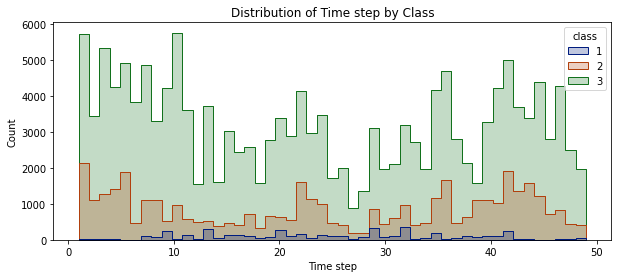

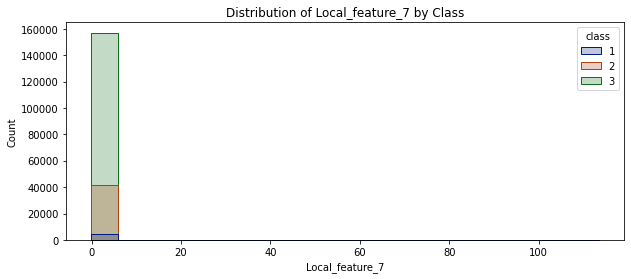

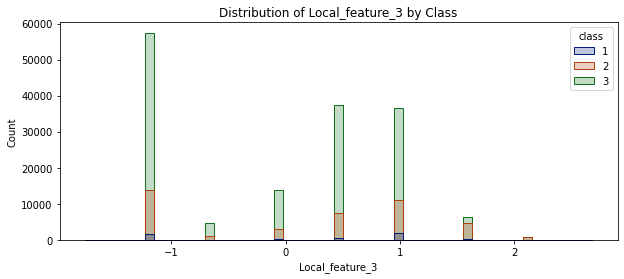

In [69]:
# Distribution plot for each class (optional, can select a few main features if there are many)
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions of a few selected features (replace 'feature1', 'feature2' with actual feature names)
selected_features = ['Time step', 'Local_feature_7', 'Local_feature_3']  # Modify based on your data
for feature in selected_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=X, x=feature, hue=y, element='step', palette="dark")
    plt.title(f'Distribution of {feature} by Class')
    plt.show()

## Feature Correlation Matrix


Highly Correlated Feature Pairs (correlation > 0.8):
[('Time step', 'Aggregate_feature_7'), ('Time step', 'Aggregate_feature_8'), ('Time step', 'Aggregate_feature_10'), ('Time step', 'Aggregate_feature_43'), ('Time step', 'Aggregate_feature_46'), ('Local_feature_1', 'Local_feature_8'), ('Local_feature_1', 'Local_feature_9'), ('Local_feature_1', 'Local_feature_11'), ('Local_feature_1', 'Local_feature_17'), ('Local_feature_1', 'Local_feature_18'), ('Local_feature_1', 'Local_feature_19'), ('Local_feature_1', 'total_BTC'), ('Local_feature_1', 'in_BTC_min'), ('Local_feature_1', 'in_BTC_max'), ('Local_feature_1', 'in_BTC_mean'), ('Local_feature_1', 'in_BTC_median'), ('Local_feature_1', 'in_BTC_total'), ('Local_feature_1', 'out_BTC_max'), ('Local_feature_1', 'out_BTC_mean'), ('Local_feature_1', 'out_BTC_median'), ('Local_feature_1', 'out_BTC_total'), ('Local_feature_2', 'fees'), ('Local_feature_4', 'Local_feature_6'), ('Local_feature_4', 'num_input_addresses'), ('Local_feature_5', 'Local_fea

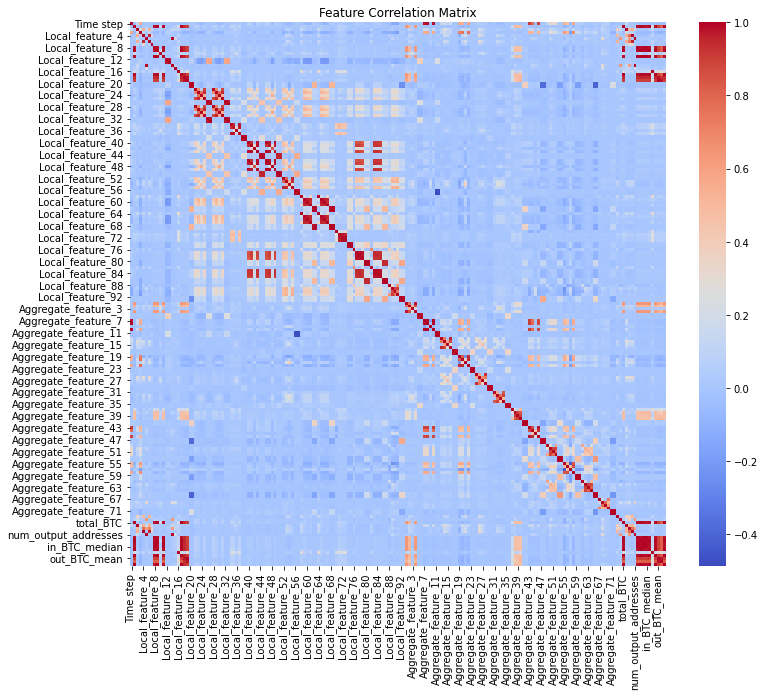

In [70]:
# Identify highly correlated features
correlation_matrix = X.corr()
high_corr_features = correlation_matrix[(correlation_matrix > 0.8) & (correlation_matrix != 1.0)].stack().index.tolist()
print("\nHighly Correlated Feature Pairs (correlation > 0.8):")
print(high_corr_features)

# Visualization of the Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

## Outliers per Class

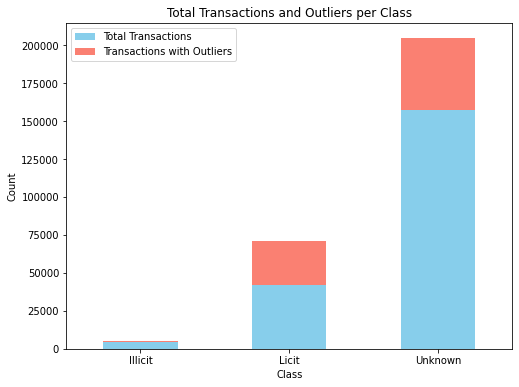

In [71]:
# Detect outliers using Z-score method (values outside 3 standard deviations)
outliers = (np.abs((X - X.mean()) / X.std()) > 3).any(axis=1)

# Calculate total and outlier counts per class
total_per_class = y.value_counts().sort_index()
outliers_per_class = y[outliers].value_counts().reindex(total_per_class.index, fill_value=0)

# Create DataFrame and plot
outlier_summary = pd.DataFrame({'Total': total_per_class, 'Outliers': outliers_per_class})
outlier_summary.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(8, 6))

plt.title('Total Transactions and Outliers per Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(['Total Transactions', 'Transactions with Outliers'])
plt.xticks(ticks=[0, 1, 2], labels=['Illicit', 'Licit', 'Unknown'], rotation=0)
plt.show()


## Feature Importance


Top 10 Important Features:
                  feature  importance
53       Local_feature_53    0.032049
65       Local_feature_65    0.031717
55       Local_feature_55    0.031623
59       Local_feature_59    0.024542
48       Local_feature_48    0.024210
42       Local_feature_42    0.023181
54       Local_feature_54    0.023131
67       Local_feature_67    0.022644
125  Aggregate_feature_32    0.020669
60       Local_feature_60    0.020572


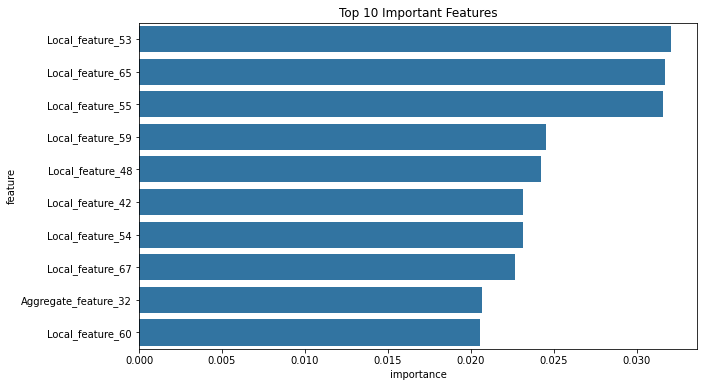

In [72]:
from sklearn.ensemble import RandomForestClassifier

# Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X, y)
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_}).sort_values(by='importance', ascending=False)

# Print and visualize top features
print("\nTop 10 Important Features:")
print(feature_importances.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(10))
plt.title("Top 10 Important Features")
plt.show()

## PCA

### 2 components

In [76]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary libraries
import numpy as np

# Merge features and labels on 'txId'
data = pd.merge(features, labels, on='txId')

# Handle NaN values by filling with the mean of each column
data.fillna(data.mean(), inplace=True)

# Separate features and target
X = data.drop(['txId', 'class'], axis=1)
y = data['class']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2-component PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Variance explained by the first two components
explained_variance_2d = pca_2d.explained_variance_ratio_
print(f"\nVariance Captured by the First Two Principal Components: {explained_variance_2d[0] + explained_variance_2d[1]:.2%}")


Variance Captured by the First Two Principal Components: 19.52%


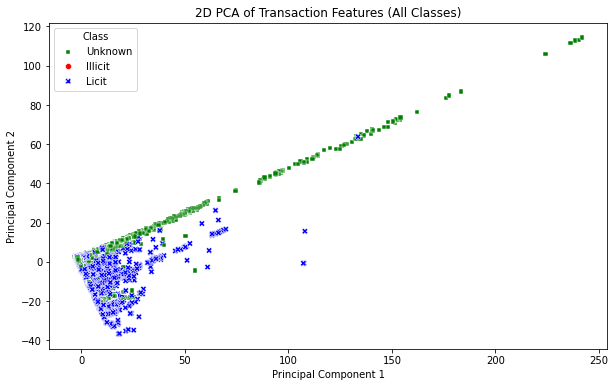

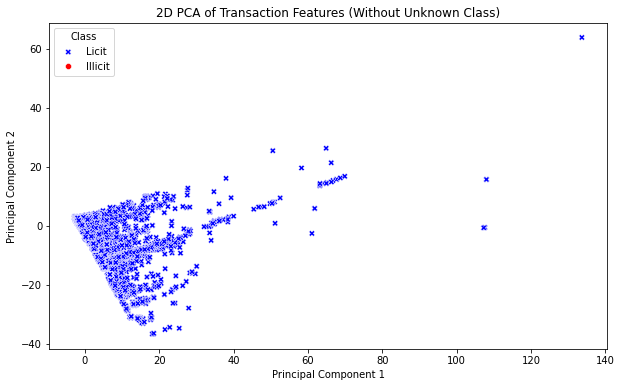

In [77]:

# 2D PCA Visualization with all classes
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette={1: 'red', 2: 'blue', 3: 'green'}, style=y, legend='full')
plt.title('2D PCA of Transaction Features (All Classes)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class', labels=['Unknown', 'Illicit',  'Licit'])
plt.show()

# Filter out the "Unknown" class (class 3) for the second plot
mask = y != 3  # Exclude the Unknown class
X_pca_filtered = X_pca_2d[mask]
y_filtered = y[mask]

# 2D PCA Visualization without the "Unknown" class
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_filtered[:, 0], y=X_pca_filtered[:, 1], hue=y_filtered, palette={1: 'red', 2: 'blue'}, style=y_filtered, legend='full')
plt.title('2D PCA of Transaction Features (Without Unknown Class)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class', labels=['Licit', 'Illicit'])
plt.show()



Variance Captured by the First Two Principal Components: 19.52%


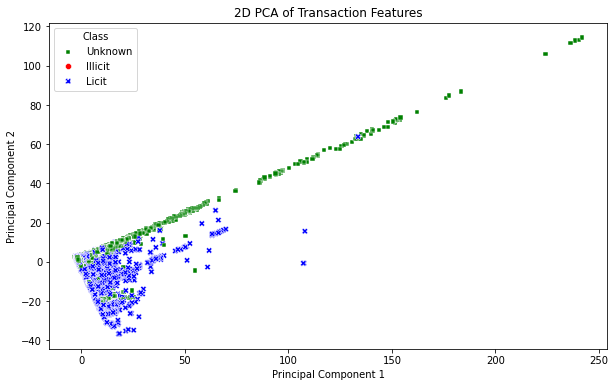

In [78]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2-component PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Variance explained by the first two components
explained_variance_2d = pca_2d.explained_variance_ratio_
print(f"\nVariance Captured by the First Two Principal Components: {explained_variance_2d[0] + explained_variance_2d[1]:.2%}")

# 2D PCA Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette={1: 'red', 2: 'blue', 3: 'green'}, style=y, legend='full')
plt.title('2D PCA of Transaction Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class', labels=[ 'Unknown', 'Illicit', 'Licit'])
plt.show()

### 3 components


Variance Captured by the First Three Principal Components: 25.37%


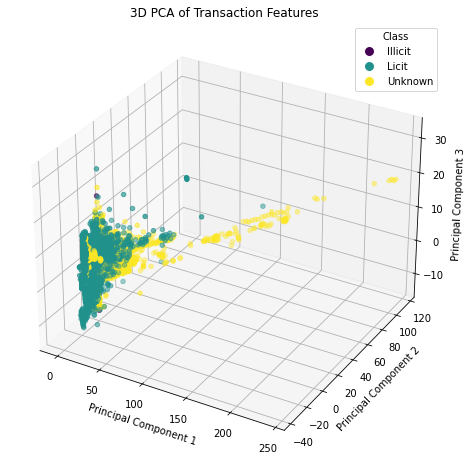

In [79]:
# 3-component PCA
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Variance explained by the first three components
explained_variance_3d = pca_3d.explained_variance_ratio_
print(f"\nVariance Captured by the First Three Principal Components: {explained_variance_3d[0] + explained_variance_3d[1] + explained_variance_3d[2]:.2%}")

# 3D PCA Visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='viridis', marker='o')
legend_labels = {1: 'Illicit', 2: 'Licit', 3: 'Unknown'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.to_rgba(i), markersize=10) for i in legend_labels.keys()]
ax.legend(legend_handles, legend_labels.values(), title='Class')
ax.set_title('3D PCA of Transaction Features')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

### 2 components (without outliers)

In [80]:
# Set the Z-score threshold (e.g., 3 for three standard deviations)
z_score_threshold = 3  # Adjust this value as needed

# Detect outliers using the specified Z-score threshold
z_scores = np.abs((X - X.mean()) / X.std())
outliers = (z_scores > z_score_threshold).any(axis=1)

# Filter out the outliers from the dataset
X_no_outliers = X[~outliers]
y_no_outliers = y[~outliers]

# Standardize the data without outliers
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_no_outliers)

# Option 1: 2D PCA Visualization (2 Principal Components)
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Variance explained by the first two components
explained_variance_2d = pca_2d.explained_variance_ratio_
print(f"\nVariance Captured by the First Two Principal Components: {explained_variance_2d[0] + explained_variance_2d[1]:.2%}")


Variance Captured by the First Two Principal Components: 19.93%


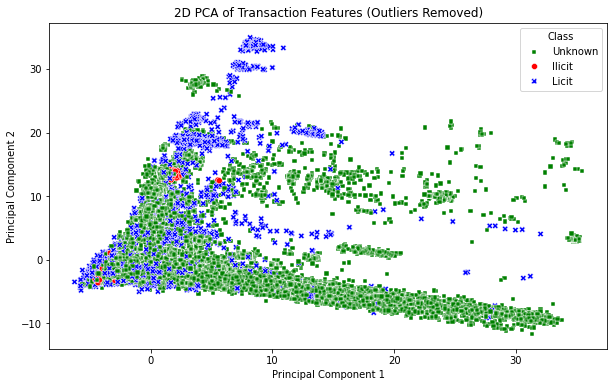

In [81]:
# 2D PCA Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y_no_outliers, palette={1: 'red', 2: 'blue', 3: 'green'}, style=y_no_outliers, legend='full')
plt.title('2D PCA of Transaction Features (Outliers Removed)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class', labels=['Unknown', 'Ilicit', 'Licit'])
plt.show()

### 3 components (without outliers)


Variance Captured by the First Three Principal Components: 26.23%


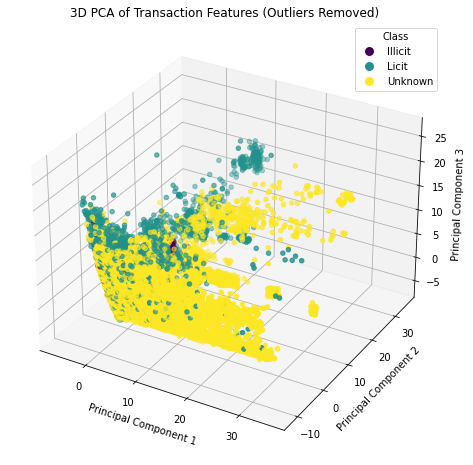

In [82]:
# Option 2: 3D PCA Visualization (3 Principal Components)
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Variance explained by the first three components
explained_variance_3d = pca_3d.explained_variance_ratio_
print(f"\nVariance Captured by the First Three Principal Components: {explained_variance_3d[0] + explained_variance_3d[1] + explained_variance_3d[2]:.2%}")

# 3D PCA Visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y_no_outliers, cmap='viridis', marker='o')
legend_labels = {1: 'Illicit', 2: 'Licit', 3: 'Unknown'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.to_rgba(i), markersize=10) for i in legend_labels.keys()]
ax.legend(legend_handles, legend_labels.values(), title='Class')
ax.set_title('3D PCA of Transaction Features (Outliers Removed)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

## More visualization

In [ ]:
# from sklearn.manifold import TSNE

# tsne = TSNE(n_components=2, random_state=0)
# X_tsne = tsne.fit_transform(X_scaled)

# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_no_outliers, palette={1: 'red', 2: 'blue', 3: 'green'})
# plt.title("t-SNE Visualization of Transaction Features")
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.legend(title='Class', labels=['Illicit', 'Licit', 'Unknown'])
# plt.show()


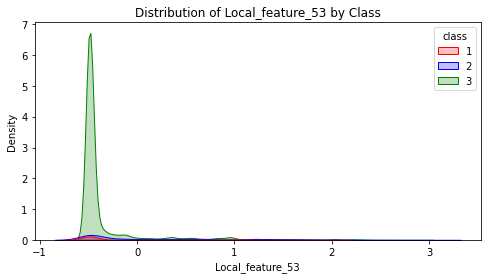

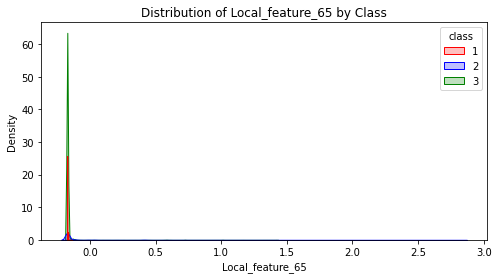

In [87]:
selected_features = ['Local_feature_53', 'Local_feature_65']  # Replace with significant features
for feature in selected_features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=X_no_outliers, x=feature, hue=y_no_outliers, palette={1: 'red', 2: 'blue', 3: 'green'}, fill=True)
    plt.title(f"Distribution of {feature} by Class")
    plt.show()
